<a href="https://colab.research.google.com/github/honggilgim/python_test_with_colab/blob/main/BostonHousing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./BostonHousing2.csv")

df.head()

,Unnamed: 0,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
# 목표 : CMEDV 예측

In [3]:
print(df.shape)

(506, 18)


In [4]:
df.isnull().sum()
#df.isnull 함수 호출 후 sum으로 합침. 각각의 칼럼들마다 결측치를 확인하는 코드. 결측치 없음이 확인됨.

Unnamed: 0    0
TOWN          0
LON           0
LAT           0
CMEDV         0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   TOWN        506 non-null    object 
 2   LON         506 non-null    float64
 3   LAT         506 non-null    float64
 4   CMEDV       506 non-null    float64
 5   CRIM        506 non-null    float64
 6   ZN          506 non-null    float64
 7   INDUS       506 non-null    float64
 8   CHAS        506 non-null    int64  
 9   NOX         506 non-null    float64
 10  RM          506 non-null    float64
 11  AGE         506 non-null    float64
 12  DIS         506 non-null    float64
 13  RAD         506 non-null    int64  
 14  TAX         506 non-null    int64  
 15  PTRATIO     506 non-null    float64
 16  B           506 non-null    float64
 17  LSTAT       506 non-null    float64
dtypes: float64(13), int64(4), object(1)
memory usage: 71.3+ KB


In [6]:
df.describe()

# -> 값을 관찰할 것. 값의 범위가 큰 것을 볼 수 있음. 변수들 사이를 구하면 크기가 맞지 않음을 알 수 있음.


,Unnamed: 0,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,146.213884,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.000000,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,126.250000,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,252.500000,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,378.750000,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,505.000000,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
num_town = df['TOWN'].unique()
print(len(num_town))
print(num_town)
# num_town -> list

92
['Nahant' 'Swampscott' 'Marblehead' 'Salem' 'Lynn' 'Sargus' 'Lynnfield'
 'Peabody' 'Danvers' 'Middleton' 'Topsfield' 'Hamilton' 'Wenham' 'Beverly'
 'Manchester' 'North Reading' 'Wilmington' 'Burlington' 'Woburn' 'Reading'
 'Wakefield' 'Melrose' 'Stoneham' 'Winchester' 'Medford' 'Malden'
 'Everett' 'Somerville' 'Cambridge' 'Arlington' 'Belmont' 'Lexington'
 'Bedford' 'Lincoln' 'Concord' 'Sudbury' 'Wayland' 'Weston' 'Waltham'
 'Watertown' 'Newton' 'Natick' 'Framingham' 'Ashland' 'Sherborn'
 'Brookline' 'Dedham' 'Needham' 'Wellesley' 'Dover' 'Medfield' 'Millis'
 'Norfolk' 'Walpole' 'Westwood' 'Norwood' 'Sharon' 'Canton' 'Milton'
 'Quincy' 'Braintree' 'Randolph' 'Holbrook' 'Weymouth' 'Cohasset' 'Hull'
 'Hingham' 'Rockland' 'Hanover' 'Norwell' 'Scituate' 'Marshfield'
 'Duxbury' 'Pembroke' 'Boston Allston-Brighton' 'Boston Back Bay'
 'Boston Beacon Hill' 'Boston North End' 'Boston Charlestown'
 'Boston East Boston' 'Boston South Boston' 'Boston Downtown'
 'Boston Roxbury' 'Boston Savin Hi

In [10]:
df.drop(["Unnamed: 0"], axis=1, inplace=True )
df.describe()

,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


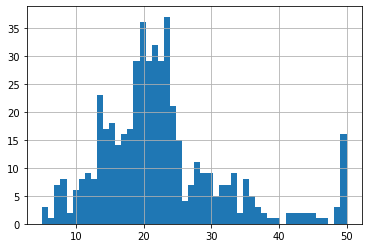

In [11]:
df['CMEDV'].hist(bins=50)

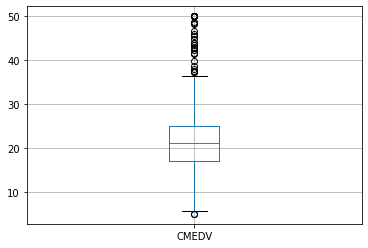

In [14]:
df.boxplot(column=['CMEDV'])
plt.show()